<a href="https://colab.research.google.com/github/yasmine-juarez/capstone/blob/Yasmine/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
df = pd.read_csv("/content/model_dataset (1).csv", low_memory=False)

features = ['v2x_api', 'v2x_libdem', 'v2x_mpi', 'e_lexical_index',
            'v2x_accountability', 'v2x_partipdem', 'v2x_clpol',
            'v2x_veracc', 'v2x_frassoc_thick', 'v2x_delibdem']

df[features] = df[features].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=features)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

Clustering on All (Free, Partially Free, Not Free)


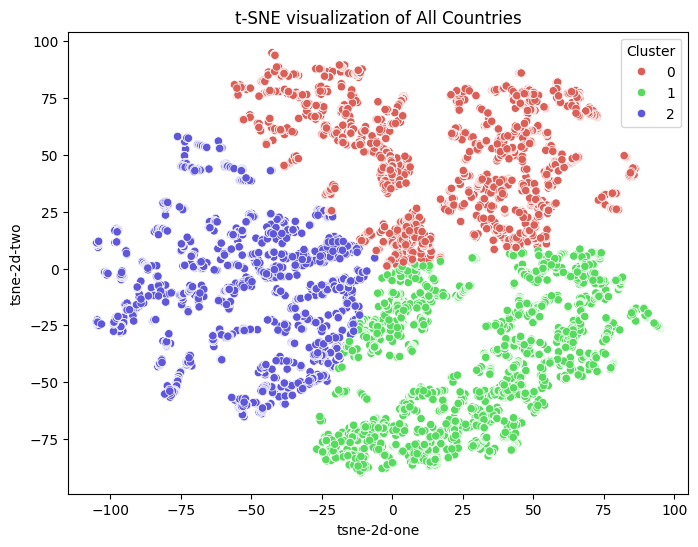

Cluster 2: Centermost country - Bolivia
Cluster 1: Centermost country - Germany
Cluster 0: Centermost country - Portugal
Clustering on Free & Partially Free


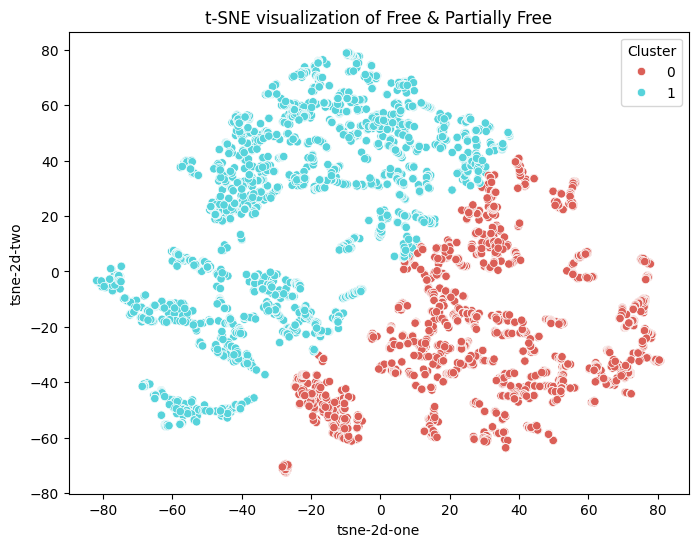

Cluster 1: Centermost country - Spain
Cluster 0: Centermost country - New Zealand
Clustering on Partially Free & Not Free


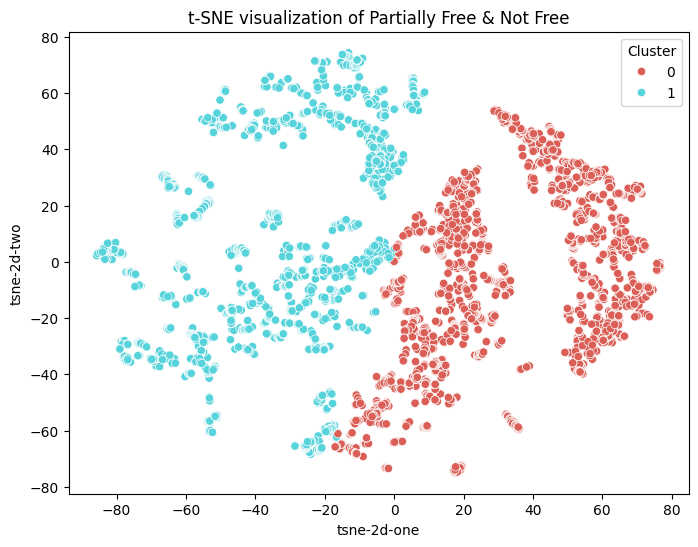

Cluster 0: Centermost country - Zimbabwe
Cluster 1: Centermost country - Vietnam


In [5]:
def perform_tsne_kmeans(df_subset, df_scaled_subset, title, k_optimal):
    # t-SNE for dimensionality reduction
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    tsne_results = tsne.fit_transform(df_scaled_subset)
    df_subset['tsne-2d-one'] = tsne_results[:, 0]
    df_subset['tsne-2d-two'] = tsne_results[:, 1]

    # KMeans clustering on t-SNE results
    kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
    df_subset = df_subset.assign(cluster=kmeans.fit_predict(tsne_results)) # Fit KMeans to t-SNE results

    # Scatter plot of t-SNE with cluster colors
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue='cluster',  # Color by cluster
                    palette=sns.color_palette("hls", k_optimal),
                    data=df_subset).set(title=f"t-SNE visualization of {title}")
    plt.legend(title='Cluster')
    plt.show()

    # Find centermost countries in t-SNE space (same logic as before)
    for cluster in df_subset['cluster'].unique():
        cluster_data = df_subset[df_subset['cluster'] == cluster][['tsne-2d-one', 'tsne-2d-two']]
        centroid = cluster_data.mean().values
        distances = cdist(cluster_data, [centroid])
        closest_country_index = distances.argmin()
        closest_country = df_subset.iloc[cluster_data.index[closest_country_index]]['country_name']
        print(f"Cluster {cluster}: Centermost country - {closest_country}")

    return df_subset
    # Applying Clustering (updated with k_optimal values)
print("Clustering on All (Free, Partially Free, Not Free)")
df_all = perform_tsne_kmeans(df, df_scaled, "All Countries", k_optimal=3)

df_free_partial = df[df['e_fh_status'].isin([1, 2])].reset_index(drop=True)
df_scaled_free_partial = scaler.fit_transform(df_free_partial[features])
print("Clustering on Free & Partially Free")
df_free_partial = perform_tsne_kmeans(df_free_partial, df_scaled_free_partial, "Free & Partially Free", k_optimal=2)

df_partial_not = df[df['e_fh_status'].isin([2, 3])].reset_index(drop=True)
df_scaled_partial_not = scaler.fit_transform(df_partial_not[features])
print("Clustering on Partially Free & Not Free")
df_partial_not = perform_tsne_kmeans(df_partial_not, df_scaled_partial_not, "Partially Free & Not Free", k_optimal=2)
